## Loan prediction


---
## **Importing packages:**
---
Packages imported are:
*   Numpy
*   Pandas
*   Matplotlib
*   Seaborn
*   Scikit Learn
---

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading the dataset**

In [216]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ZDVJ1Gb5seIvqEXRG4M6XakWcmyem10aS8JNTAm6bf0E',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'loanpredictionmodeldeployment-donotdelete-pr-bj1w1aumirizpo'
object_key = 'loan_prediction.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data=data.rename(columns={'Self_Employed':'Employment','Married':'Marital_Status'})
data.head()

,Loan_ID,Gender,Marital_Status,Dependents,Education,Employment,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [217]:
data.drop(columns=['Loan_ID'],inplace=True)
data.head()

,Gender,Marital_Status,Dependents,Education,Employment,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [218]:
data.shape

(614, 12)

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Marital_Status     611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Employment         582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [220]:
data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [221]:
data.Marital_Status.value_counts()

Yes    398
No     213
Name: Marital_Status, dtype: int64

In [222]:
data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [223]:
data.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [224]:
data.Employment.value_counts()

No     500
Yes     82
Name: Employment, dtype: int64

In [225]:
data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [226]:
data.Property_Area.value_counts().sort_values

<bound method Series.sort_values of Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64>

In [227]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## **3. Data Vizualization**

Univariate Analysis

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

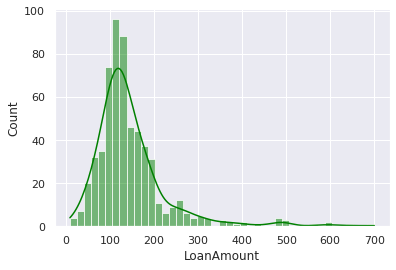

In [228]:
sns.histplot(data.LoanAmount,color='green',kde=True)

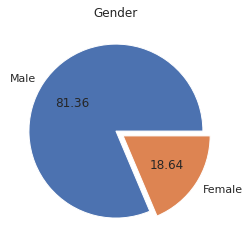

In [229]:
plt.pie(data.Gender.value_counts(),[0,0.1],labels=['Male','Female'],autopct="%.2f")
plt.title('Gender')
plt.show()

In [230]:
data.head()

,Gender,Marital_Status,Dependents,Education,Employment,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<BarContainer object of 4 artists>

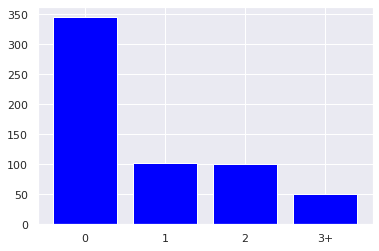

In [231]:
plt.bar(data.Dependents.value_counts().index,data.Dependents.value_counts(),color='blue')

Bi-Variate Analysis

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

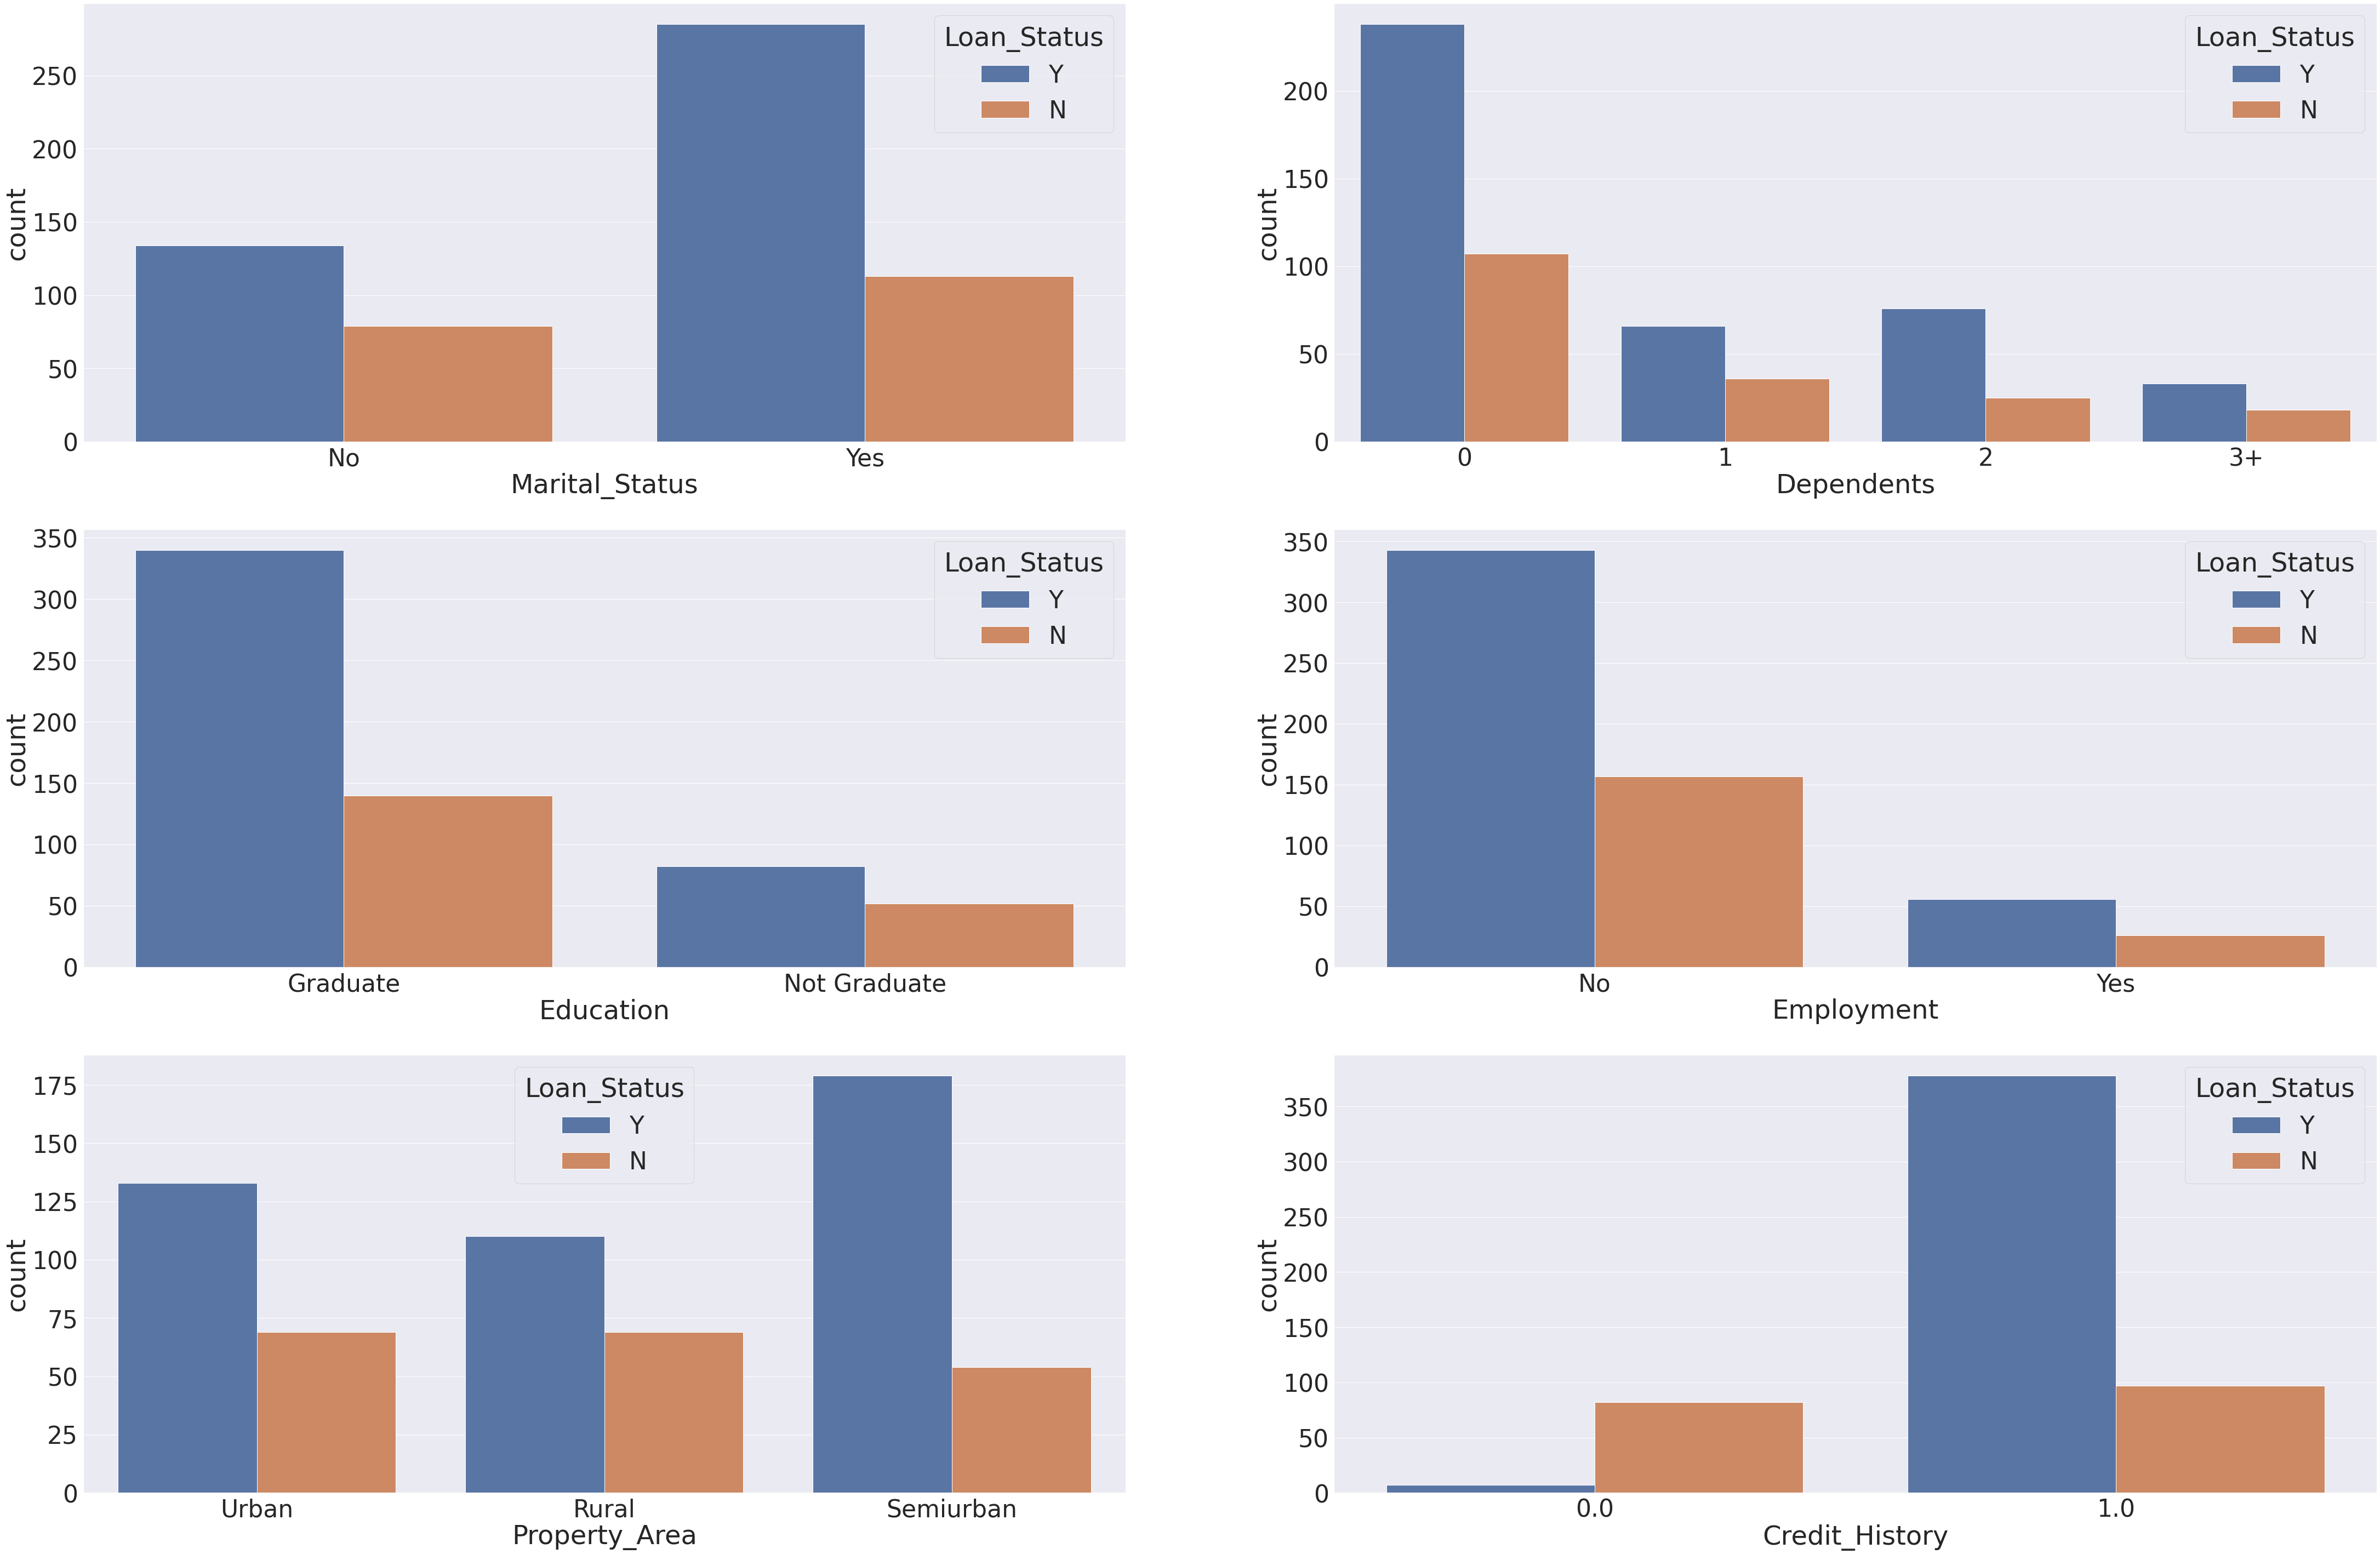

In [232]:
%matplotlib inline
plt.figure(figsize=(75,50))
sns.set_theme(font_scale=4)
plt.subplot(3,2,1)
sns.countplot(x=data.Marital_Status,hue=data.Loan_Status)
plt.subplot(3,2,2)
sns.countplot(x=data.Dependents,hue=data.Loan_Status)
plt.subplot(3,2,3)
sns.countplot(x=data.Education,hue=data.Loan_Status)
plt.subplot(3,2,4)
sns.countplot(x=data.Employment,hue=data.Loan_Status)
plt.subplot(3,2,5)
sns.countplot(x=data.Property_Area,hue=data.Loan_Status)
plt.subplot(3,2,6)
sns.countplot(x=data.Credit_History,hue=data.Loan_Status)

Multi-Variate Analysis

<AxesSubplot:>

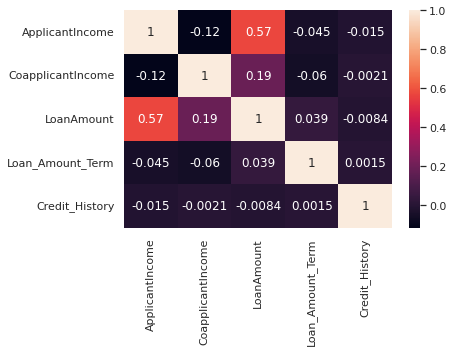

In [233]:
sns.set_theme(font_scale=1)
sns.heatmap(data=data.corr(),annot=True)

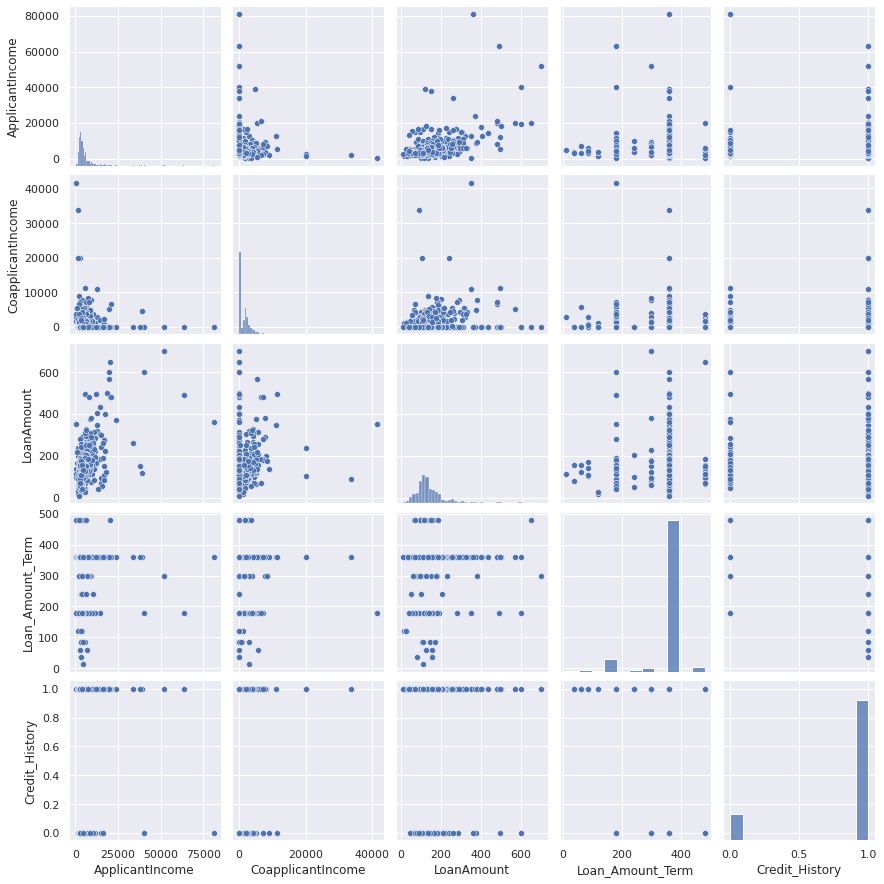

In [234]:
sns.pairplot(data)

## **Exploratory Data Analysis**


In [235]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


We can check wether our analysis is correct using **heatmap** before applying machine learning. According to project flow we are instructed to use the following algorithms : 
*   ***KNN algorithm***
*   ***Random Forest algorithm***
*   ***Desision Tree classification***
*   ***XgBoost***

and find the best algorithm for this prediction interms of metrics like:
*   **Accuracy**
*   **Precision**
*   **Recall**
*   **F1 score** 

---


## **5. Handling Null values:**

In [236]:
data.isna().sum()

Gender               13
Marital_Status        3
Dependents           15
Education             0
Employment           32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [237]:
data.Gender.fillna(data.Gender.mode()[0],inplace=True)
data.Gender.isna().sum()

0

In [238]:
data.Marital_Status.fillna(data.Marital_Status.mode()[0],inplace=True)
data.Marital_Status.isna().sum()

0

In [239]:
data.Dependents.fillna(data.Dependents.mode()[0],inplace=True)
data.Dependents.isna().sum()

0

In [240]:
data.Employment.fillna(data.Employment.mode()[0],inplace=True)
data.Employment.isna().sum()

0

In [241]:
data.LoanAmount.fillna(value=data.LoanAmount.median(),inplace=True)
data.LoanAmount.isna().sum()

0

In [242]:
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.median(),inplace=True)
data.Loan_Amount_Term.isna().sum()

0

In [243]:
data.Credit_History.fillna(data.Credit_History.mode()[0],inplace=True)
data.Credit_History.isna().sum()

0

In [244]:
data.isna().sum()

Gender               0
Marital_Status       0
Dependents           0
Education            0
Employment           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## **Find the outliers and relace them**

<AxesSubplot:xlabel='Loan_Amount_Term'>

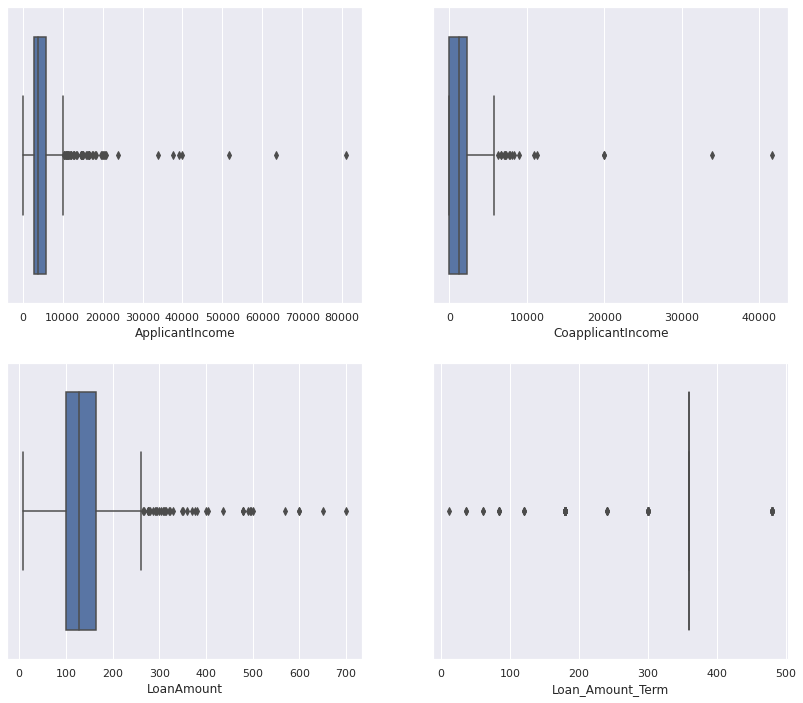

In [245]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
sns.boxplot(data=data,x='ApplicantIncome')
plt.subplot(2,2,2)
sns.boxplot(data=data,x='CoapplicantIncome')
plt.subplot(2,2,3)
sns.boxplot(data=data,x='LoanAmount')
plt.subplot(2,2,4)
sns.boxplot(data=data,x='Loan_Amount_Term')

<AxesSubplot:xlabel='ApplicantIncome'>

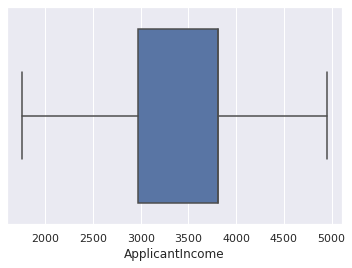

In [246]:
q1=data.ApplicantIncome.quantile(0.27)
q3=data.ApplicantIncome.quantile(0.49)
IQR=q3-q1
upper_lim=q3 + 1.5 * IQR
lower_lim=q1 -1.5 * IQR
data.ApplicantIncome=np.where(data.ApplicantIncome > upper_lim,data.ApplicantIncome.median(),data.ApplicantIncome)
data.ApplicantIncome=np.where(data.ApplicantIncome < lower_lim,data.ApplicantIncome.median(),data.ApplicantIncome)
sns.boxplot(data=data,x='ApplicantIncome')

<AxesSubplot:xlabel='CoapplicantIncome'>

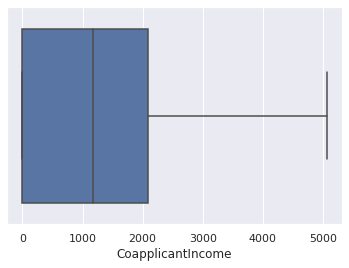

In [247]:
q1=data.CoapplicantIncome.quantile(0.25)
q3=data.CoapplicantIncome.quantile(0.71)
IQR=q3-q1
upper_lim=q3 + 1.5 * IQR
data.CoapplicantIncome=np.where(data.CoapplicantIncome > upper_lim,data.CoapplicantIncome.median(),data.CoapplicantIncome)
sns.boxplot(data=data,x='CoapplicantIncome')

<AxesSubplot:xlabel='LoanAmount'>

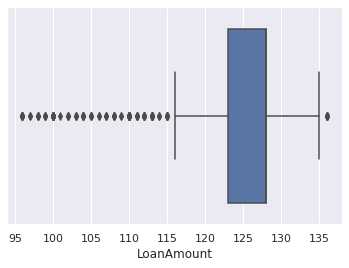

In [248]:
q1=data.LoanAmount.quantile(0.20)
q3=data.LoanAmount.quantile(0.60)
data.LoanAmount=np.where(data.LoanAmount > q3,data.LoanAmount.median(),data.LoanAmount)
data.LoanAmount=np.where(data.LoanAmount < q1,data.LoanAmount.median(),data.LoanAmount)
sns.boxplot(data=data,x='LoanAmount')

Furthur replacement of outliers with median will replace all of the value in the column with median

## **Perform encoding on categorical columns**

In [249]:
data.head()

,Gender,Marital_Status,Dependents,Education,Employment,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,3812.5,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,128.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,3812.5,0.0,128.0,360.0,1.0,Urban,Y


In order to find correlation between each columns and apply Machine Learning algorithms We need to convert object data type columns to either to int or float for the algorithms to work properly.
The columns of datatype object other than the predicted variable are:

*   `Gender`
*   `Marital_Status`
*   `Dependents`
*   `Education`
*   `Employment`
*   `Property_Area`


In [250]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Gender=le.fit_transform(data.Gender)
data.Marital_Status=le.fit_transform(data.Marital_Status)
data.Dependents=le.fit_transform(data.Dependents)
data.Education=le.fit_transform(data.Education)
data.Employment=le.fit_transform(data.Employment)
data.Property_Area=le.fit_transform(data.Property_Area)
data.Loan_Status=le.fit_transform(data.Loan_Status)

In [251]:
data.head()

,Gender,Marital_Status,Dependents,Education,Employment,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,3812.5,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,128.0,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,3812.5,0.0,128.0,360.0,1.0,2,1


<AxesSubplot:>

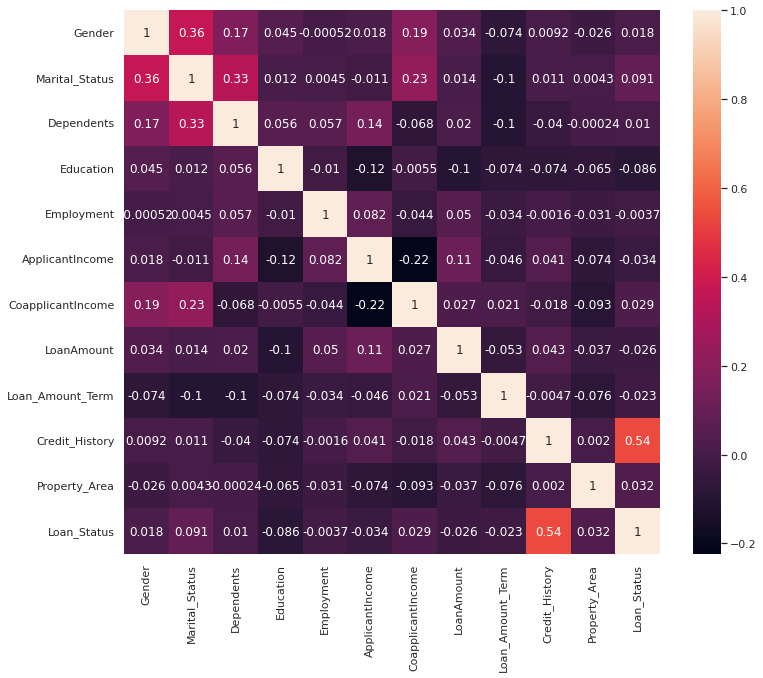

In [252]:
plt.figure(figsize=(12,10))
sns.set_theme(font_scale=1)
sns.heatmap(data.corr(),annot=True)

In [253]:
data.Loan_Status=data.Loan_Status.map({1:'Y',0:'N'})
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## **Split the data into dependent and independent variables**

In [254]:
x=data.drop(columns=['Loan_Status'])
x

,Gender,Marital_Status,Dependents,Education,Employment,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,3812.5,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000.0,0.0,128.0,360.0,1.0,2
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,3812.5,0.0,128.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900.0,0.0,128.0,360.0,1.0,0
610,1,1,3,0,0,4106.0,0.0,128.0,180.0,1.0,0
611,1,1,1,0,0,3812.5,240.0,128.0,360.0,1.0,2
612,1,1,2,0,0,3812.5,0.0,128.0,360.0,1.0,2


In [255]:
y=data.Loan_Status
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

## **Scale the independent variables**


In [256]:
from sklearn.preprocessing import scale
x_scaled=pd.DataFrame(scale(x),columns=x.columns)
x_scaled.head()

,Gender,Marital_Status,Dependents,Education,Employment,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.491775,-0.912834,0.476889,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,1.559202,0.219569,0.476889,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.633838,-0.912834,0.476889,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-1.211537,0.857860,-0.396193,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.491775,-0.912834,0.476889,0.273231,0.411733,1.223298


## **Split the data into training and testing**

In [257]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=3)

In [258]:
train_test_shape={'x_train':x_train.shape,'x_test':x_test.shape,'y_train':y_train.shape,'y_test':y_test.shape}
pd.Series(train_test_shape)

x_train    (429, 11)
x_test     (185, 11)
y_train       (429,)
y_test        (185,)
dtype: object

## **Build the model**

In [259]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

## Random Forest Calssification Algorithm

In [260]:
model=RandomForestClassifier(n_estimators=100,random_state=5,max_depth=6)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, random_state=5)

In [261]:
train_predict=model.predict(x_train)
train_predict

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [262]:
test_predict=model.predict(x_test)
test_predict

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N

**Training Accuracy score:**

In [263]:
train_acc_score = accuracy_score(y_train,train_predict)*100
train_acc_score

81.81818181818183

In [264]:
test_acc_score = accuracy_score(y_test,test_predict)*100
test_acc_score

84.86486486486487

In [265]:
pd.crosstab(y_test,test_predict)

col_0,N,Y
Loan_Status,,
N,21,24
Y,4,136


In [266]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           N       0.84      0.47      0.60        45
           Y       0.85      0.97      0.91       140

    accuracy                           0.85       185
   macro avg       0.84      0.72      0.75       185
weighted avg       0.85      0.85      0.83       185



## IBM Deployment

In [267]:
!pip install -U ibm-watson-machine-learning

In [268]:
from ibm_watson_machine_learning import APIClient
import json

## Authenticate and Set Space

In [269]:
wml_credentials ={
    "apikey":"7mtMr5nCl5IrGwBhi0Q-WFgNz6C8WNAtTAQcrM3a3Qt2",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [270]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------------------------  ------------------------
ID                                    NAME                         CREATED
83631cb3-683c-43cb-a1dc-fec22bab0196  loan_eligibility_prediction  2022-10-28T13:36:31.866Z
------------------------------------  ---------------------------  ------------------------


In [271]:
SPACE_ID = "83631cb3-683c-43cb-a1dc-fec22bab0196" 

In [272]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [273]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

## Save and deploy the model

In [274]:
import sklearn
sklearn.__version__

'1.0.2'

In [275]:
MODEL_NAME = 'loan_eligibility_prediction'
DEPLOYMENT_NAME = 'loan_eligibility_prediction'
DEMO_MODEL = model

In [276]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [277]:
# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [278]:
#Save model
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=x_train, 
    training_target=y_train
)

In [279]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Loan_Status',
  'schemas': {'input': [{'fields': [{'name': 'Gender', 'type': 'float64'},
      {'name': 'Marital_Status', 'type': 'float64'},
      {'name': 'Dependents', 'type': 'float64'},
      {'name': 'Education', 'type': 'float64'},
      {'name': 'Employment', 'type': 'float64'},
      {'name': 'ApplicantIncome', 'type': 'float64'},
      {'name': 'CoapplicantIncome', 'type': 'float64'},
      {'name': 'LoanAmount', 'type': 'float64'},
      {'name': 'Loan_Amount_Term', 'type': 'float64'},
      {'name': 'Credit_History', 'type': 'float64'},
      {'name': 'Property_Area', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-10-28T14:11:25.750Z',
  'id': '62cc3f73-1692-4638-8fb9-af089506b8a9',
  'modified_at': '2022-10-28T

In [280]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'62cc3f73-1692-4638-8fb9-af089506b8a9'

In [281]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [282]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: '62cc3f73-1692-4638-8fb9-af089506b8a9' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='a820ff74-422b-4477-a6ee-929e81de0327'
------------------------------------------------------------------------------------------------


